# **Credit Card Fraud Classifier**


A classifier is a machine learning model that assigns labels (e.g., "fraud" or "not fraud") to input data (e.g., transaction details).
A credit card fraud classifier specifically:


*   Takes transaction data as input
*   Predicts whether each transaction is fraudulent (1) or legitimate (0)


# **Data Processing**

Firstly, import Dataset by uploading in the google colab and enabling mount to drive button.

**Dataset description:**
* it contains 31 features describing the details of user in particular bank.
* personal details are already in vectorised form
* properly processed and cleaned dataset by default


**Source**:

Downloaded from kaggle datasets: https://www.kaggle.com/code/gaamoucimohamed/creadit-card-fraud-detection

In [1]:
import pandas as pd
df=pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**df.shape** : shape function returns the size of the dataframe **df**

In [2]:
df.shape

(284807, 31)

**df.info()** : it describes the datatypes of each columns in dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**df.describe()** : it gives statiscal description of dataframe

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**df.isnull().sum()** : it gives number of null values in each column

In [5]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Since as per the analysis, we found Null values in the features of the dataframe, so we need to remove these inconsistencies to make data consistent for model implementation.

for null values,

**df.dropna()** : used to drop null values from each feature of the dataframe.

In [4]:
df.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11953,20625,-0.653155,0.372141,2.209254,-2.151937,0.451189,0.822337,0.267881,0.083443,2.295254,...,-0.149850,0.151803,-0.505597,-1.181476,0.535504,-0.759489,-0.068433,-0.176549,11.85,0.0
11954,20631,1.504204,-0.411728,0.200090,-0.778753,-0.442232,-0.119677,-0.782660,-0.165178,0.691819,...,-0.136231,-0.217274,-0.143260,-1.057332,0.529188,-0.235062,-0.012089,0.000905,9.00,0.0
11955,20636,1.134994,0.096340,0.277921,0.319692,0.742800,1.611803,-0.458649,0.390012,1.424541,...,-0.395605,-0.743542,0.222256,-1.859104,-0.109777,0.279049,0.012398,-0.009090,0.99,0.0
11956,20638,-6.305012,3.944886,-4.707362,1.539602,-3.934785,-1.730565,-2.104936,3.843447,0.863458,...,0.073140,-0.039935,-0.108896,0.691434,-0.261979,-0.447540,0.212900,-0.031021,89.99,0.0


**df.drop_duplicayes(inplace=True)** :

* **drop_duplicates()** removes any rows that are exactly the same across all columns.

* **inplace=True** means the changes are made directly to df without needing to assign it to a new variable.

In [6]:
df.drop_duplicates(inplace=True)

**df.duplicate().sum()** : it finds all duplicate value and provides the total count of dataframe as summation

In [7]:
print(df.duplicated().sum())

0


**df['Class'].value_counts()** :

* **df['Class']** accesses the 'Class' column of the DataFrame (commonly used to store labels like 0 for legitimate, 1 for fraud).

* **.value_counts()** returns a frequency count of each unique value.

In [8]:
df['Class'].value_counts()

,count
Class,
0,283253
1,473


* Import the matplotlib library for plotting.

* Create a pie chart to visualize the distribution of fraud and non-fraud transactions.

* df['Class'].value_counts() gets the count of each class (e.g., 0 = not fraud, 1 = fraud).
* autopct="%.2f" shows the percentage of each class on the pie chart with two decimal places.

* labels=['Not fraud', 'Fraud'] assigns readable labels to the pie slices.

* plt.legend() adds a legend to the chart for clarity.

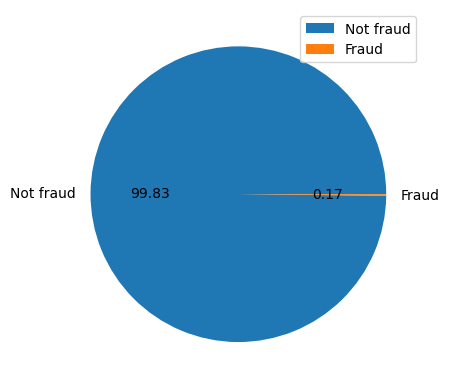

In [9]:
import matplotlib.pyplot as plt
plt.pie(df['Class'].value_counts(),autopct="%.2f",labels=['Not fraud','Fraud'])
plt.legend()

Import the Seaborn library for data visualization.

* Plot a line graph of the Amount column to observe trends or fluctuations in transaction amounts across the dataset (based on row order).

* This can help identify unusual patterns or spikes that may indicate potential fraud.

<Axes: ylabel='Amount'>

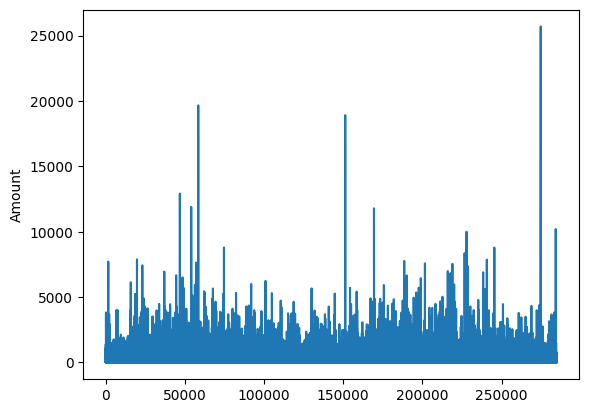

In [10]:
import seaborn as sns

sns.lineplot(df['Amount'])

In [11]:
# we will drop time because it will not help in building the model
df.drop(['Time'],inplace=True,axis=1)

In [13]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


**x = df.iloc[:, :-1]**

* Selects all rows (:) and all columns except the last (:-1)

* Represents the independent variables (features)

* Used by the model to learn patterns



**y = df.iloc[:, -1]**

* Selects all rows (:) and only the last column (-1)

* Represents the dependent variable (target/output)

* Typically the label or outcome we want to predict

In [12]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [14]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


## Data splitting (Test/Train)

data splitting into testing and training set for model training and testing of the model and checking the accuracy/prediction over testing data.

**from sklearn.model_selection import train_test_split**

* Imports the function used to split data into training and testing subsets.

**x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)**

* Splits the independent features (x) and dependent labels (y) into training and testing sets.

* **x_train**: 70% of the input features (used to train the model)

* **x_test**: 30% of the input features (used to test the model)

* **y_train**: Labels corresponding to x_train

* **y_test**: Labels corresponding to x_test

* **test_size=0.3**: Reserves 30% of the data for testing.

* **random_state=22**: Ensures consistent data shuffling each time you run the code.


In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=22)

In [16]:
x_train.shape, x_test.shape

((198608, 29), (85118, 29))

## Scaling the data

Scaling the data ensures that all features contribute equally to the model's learning process by bringing them onto a similar scale.

 Common techniques include StandardScaler, which standardizes features by removing the mean and scaling to unit variance, and MinMaxScaler, which scales all features to a fixed range, typically between 0 and 1.

* import **StandardScaler** from **sklearn.preprocessing** to perform feature scaling.

* Initialize the scaler object to standardize features by removing the mean and scaling to unit variance.

* Use **fit_transform()** on x_train to compute the mean and standard deviation from the training data and apply scaling.

* Use **transform()** on x_test to scale the test data using the parameters (mean and std) learned from the training set.


In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

x_train.shape,x_test.shape

((198608, 29), (85118, 29))

## Model Implementation

Models which can be implemented as per the requirement of prediction/Target variable are:

* **Logistic Regression** :
A simple linear model that predicts the probability of fraud; fast and interpretable but may miss complex patterns.

* **Decision Tree** :
Splits data based on feature values to classify fraud; easy to understand but can overfit.

* **Random Forest** :
An ensemble of decision trees that improves accuracy and reduces overfitting; less interpretable but powerful.

* **Gradient Boosting (XGBoost, LightGBM)** :
Sequentially builds trees to correct errors; achieves high accuracy but needs careful tuning.

* **Support Vector Machine (SVM)** :
Finds the best boundary separating fraud and non-fraud; works well in high dimensions but slow on large data.

* **K-Nearest Neighbors (KNN)** :
Classifies based on the closest data points; simple but slow and sensitive to irrelevant features.

* **Neural Networks** :
Deep models that capture complex fraud patterns; require lots of data and computation.

* **Anomaly Detection (Isolation Forest, One-Class SVM)** :
Detects unusual transactions without labeled fraud data; useful when fraud labels are scarce.

In [18]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [19]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

## Model Evaluation

Model evaluation is the process of measuring how well a machine learning model performs on unseen data. It helps determine the model's accuracy, ability to generalize, and detect errors. Common metrics for classification tasks (like fraud detection) include:

* Accuracy – Overall correctness of predictions

* Precision – Proportion of predicted frauds that are actually fraud

* Recall – Proportion of actual frauds that were correctly predicted

* F1-Score – Harmonic mean of precision and recall

* Confusion Matrix – Breakdown of true vs. false positives and negatives

These metrics help you choose the best model and fine-tune it for better performance.

In [20]:
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84968
           1       0.85      0.62      0.72       150

    accuracy                           1.00     85118
   macro avg       0.92      0.81      0.86     85118
weighted avg       1.00      1.00      1.00     85118



In [21]:
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[84951    17]
 [   57    93]]
Accuracy: 0.9991306186705514


Visualisation of Confusion Matric for better understanding

* Imports **ConfusionMatrixDisplay** from **sklearn.metrics** to support confusion matrix visualization.

* Sets the figure size to 10x7 inches using **plt.figure(figsize=(10,7))** to make the plot more readable.

* Uses **sns.heatmap()** to create a heatmap of the confusion matrix:

* **confusion_matrix(y_test, y_pred)** calculates how many predictions were correct or incorrect.

* **annot=True** displays the actual counts in each cell.

* **fmt='d'** ensures the counts are shown as whole numbers (integers).

* **cmap='Blues'** applies a blue color gradient to the heatmap for visual clarity.

* Adds a title "Confusion Matrix Heatmap" to describe the plot’s purpose.

* Labels the x-axis as "Predicted" and y-axis as "Actual" to indicate the orientation of the matrix.

* Uses **plt.show()** to render and display the heatmap plot.

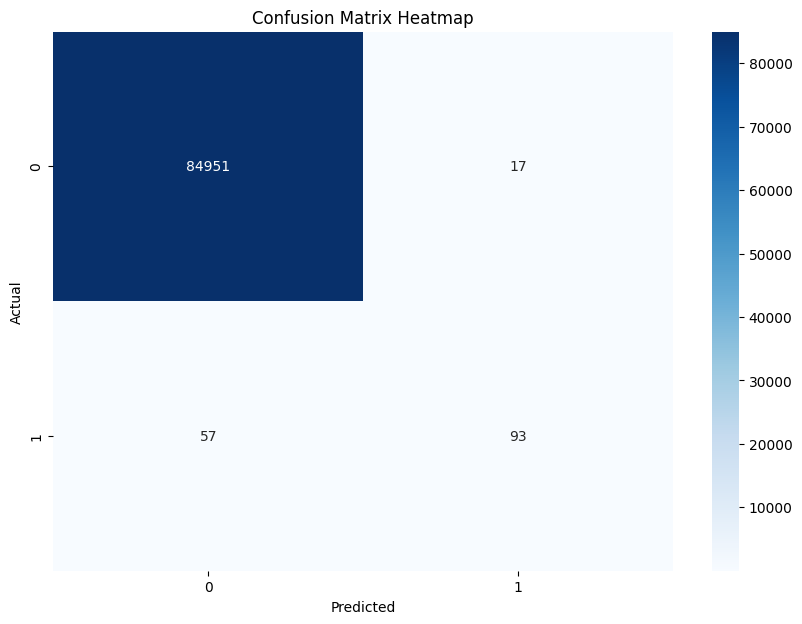

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **Executing Decision Tree**



In [23]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
y_pred_tree=model.predict(x_test)

In [25]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84968
           1       0.76      0.78      0.77       150

    accuracy                           1.00     85118
   macro avg       0.88      0.89      0.89     85118
weighted avg       1.00      1.00      1.00     85118



In [26]:
accuracy_score(y_test, y_pred_tree)

0.9991893606522709

In [27]:
confusion_matrix(y_test, y_pred_tree)

array([[84932,    36],
       [   33,   117]])

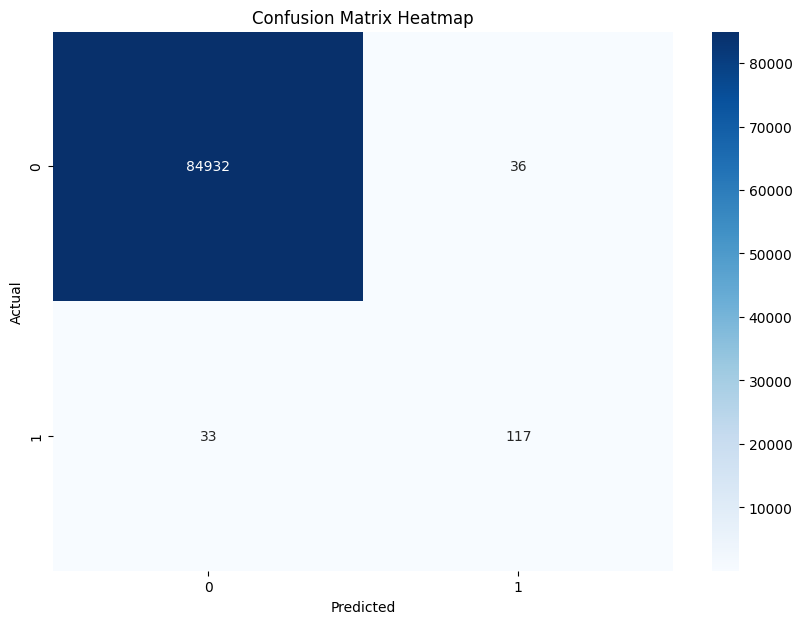

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **Random Forest**

In [29]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
y_pred_rf=model.predict(x_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84968
           1       0.85      0.62      0.72       150

    accuracy                           1.00     85118
   macro avg       0.92      0.81      0.86     85118
weighted avg       1.00      1.00      1.00     85118



In [32]:
accuracy_score(y_test, y_pred_tree)

0.9991893606522709

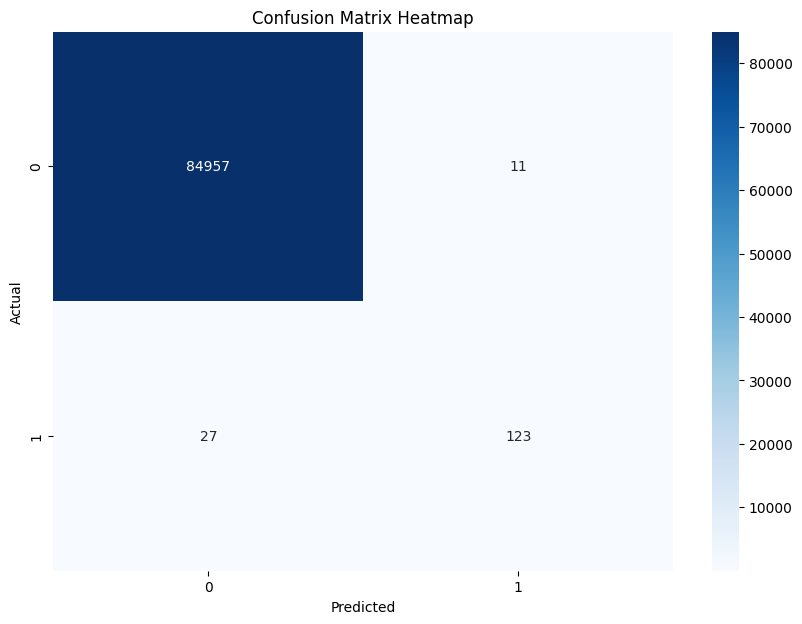

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Conclusion:**

As per all the model executed, we can conclude random forest gives the better results as:
* it has lesser number of false negatives
* False positives are minimal
* overall accuracy is 99.91